In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

In [ ]:
# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Seaborn for easier visualization
import seaborn as sns

In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load international online transactions data from CSV
df = pd.read_csv('int_online_tx.csv')

In [ ]:
df.shape

(35116, 8)

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12-01-2010 08:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12-01-2010 08:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12-01-2010 08:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12-01-2010 08:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12-01-2010 08:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12-01-2010 08:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12-01-2010 08:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12-01-2010 08:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12-01-2010 08:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12-01-2010 08:45,1.95,12583.0,France


In [ ]:
# Make figsize
plt.figure(figsize=(9,10))

<Figure size 900x1000 with 0 Axes>

<Figure size 900x1000 with 0 Axes>

<Axes: xlabel='count', ylabel='Country'>

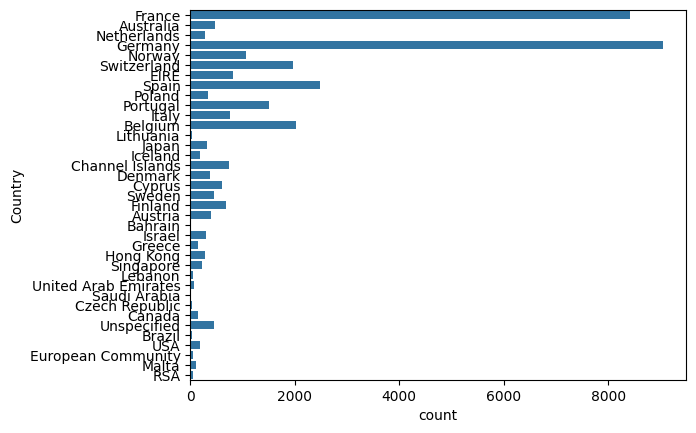

In [ ]:
# Bar plot by country
sns.countplot(y='Country', data=df)

In [ ]:
# Missing data by feature
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [ ]:
# Only keep transactions with CustomerID's
df = df[df.CustomerID.notnull()]

In [ ]:
# Convert customer ID's into integers
df['CustomerID'] = df.CustomerID.astype(int)

In [ ]:
# Display first 5 CustomerID's in the transaction dataset
df.CustomerID.head()

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int64

In [ ]:
# Create 'Sales' interaction feature
df['Sales'] = df.Quantity * df.UnitPrice

In [ ]:
# Display first 5 Sales values in the transaction dataset
df.Sales.head()

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

In [ ]:
# Save cleaned transaction-level data
df.to_csv('cleaned_transactions.csv', index=None)

In [ ]:
# Aggregate invoice data
invoice_data = df.groupby('CustomerID').InvoiceNo.agg(total_transactions='nunique')

In [ ]:
# Display invoice data for first 5 customers
invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [ ]:
# Aggregate product data
product_data = df.groupby('CustomerID').StockCode.agg(total_products='count', total_unique_products='nunique')

# Display product data for first 5 customers
product_data.head()

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [ ]:
# Roll up sales data
sales_data = df.groupby('CustomerID').Sales.agg(total_sales='sum', avg_product_value='mean')

# Display sales data for first 5 customers
sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [ ]:
# Aggregate cart-level data (i.e., invoice-level)
cart_data = df.groupby(['CustomerID', 'InvoiceNo']).Sales.agg(cart_value='sum')

# Display cart data for first 20 CARTS
cart_data.head(20)

cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
           573511        1294.32
           581180         224.82
12348      539318         892.80
           541998         227.44
           548955         367.00
           568172         310.00
12349      577609        1757.55
12350      543037         334.40
12352      544156         296.50
           545323         144.35
           545332         840.30
           546869         120.33
           547390         160.33
           567505         366.25
           568699         266.25

In [ ]:
# Reset index
cart_data.reset_index(inplace=True)

# Display cart data for first 10 CARTS
cart_data.head(10)

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
5,12347,573511,1294.32
6,12347,581180,224.82
7,12348,539318,892.80
8,12348,541998,227.44
9,12348,548955,367.00


In [ ]:
# Aggregate cart data at customer-level
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg(avg_cart_value='mean',
                                                               min_cart_value='min',
                                                               max_cart_value='max')

# Display cart data for first 5 CUSTOMERS
agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


In [ ]:
# Join together customer-level data
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [ ]:
# Save analytical base table
customer_df.to_csv('analytical_base_table.csv')

# Read cleaned_transactions.csv
df = pd.read_csv('cleaned_transactions.csv')

In [ ]:
# Get item_dummies - creates the vector of StockCode
item_dummies = pd.get_dummies(df.StockCode)

item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Add CustomerID to item_dummies
item_dummies['CustomerID'] = df.CustomerID

# Display first 5 rows of item_dummies
item_dummies.head()

# Create item_data by aggregating at customer level
item_data = item_dummies.groupby('CustomerID').sum()

# Display first 5 rows of item_data
item_data.head()

# Total times each item was purchased
item_data.sum()

# Save item_data.csv
item_data.to_csv('item_data.csv')

# Display most popular 20 items
item_data.sum().sort_values().tail(120)

22748        50
22847        50
15056BL      50
23159        50
85014B       50
           ... 
22556       179
22554       197
22423       222
22326       271
POST       1055
Length: 120, dtype: int64

In [ ]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values().tail(120).index

top_20_items

# Keep only features for top 20 items
top_20_item_data = item_data[top_20_items]

# Shape of remaining dataframe
top_20_item_data.shape

top_20_item_data.head()

# Save threshold_item_data.csv
top_20_item_data.to_csv('threshold_item_data.csv')